In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
np.seterr(invalid='ignore')
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
pd.options.display.max_columns = 999
from get_stats import get_stats
from heat_map import get_heat_map
from series import get_series_data, get_series_shot_chart

game = '12.06.23_Clippers'
total = '!season_totals'
series = '!series_data'
opponent = game[9:]

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


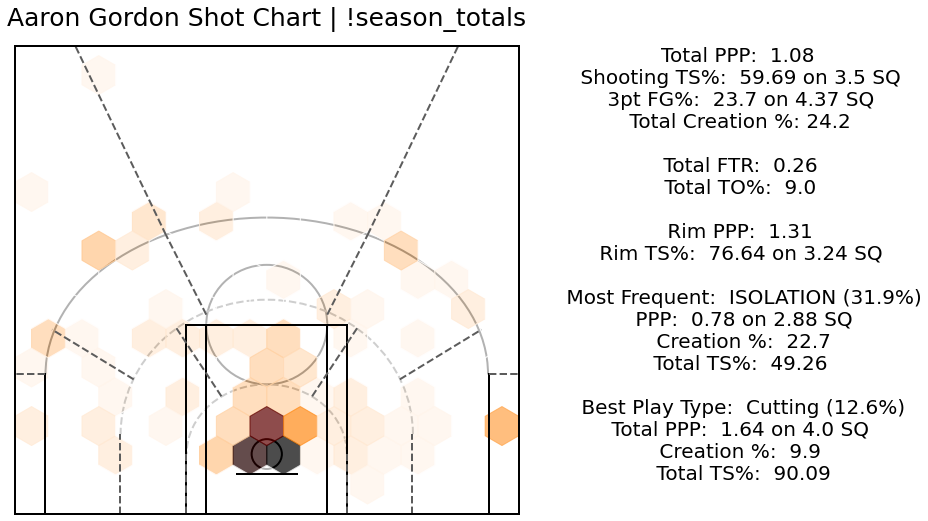

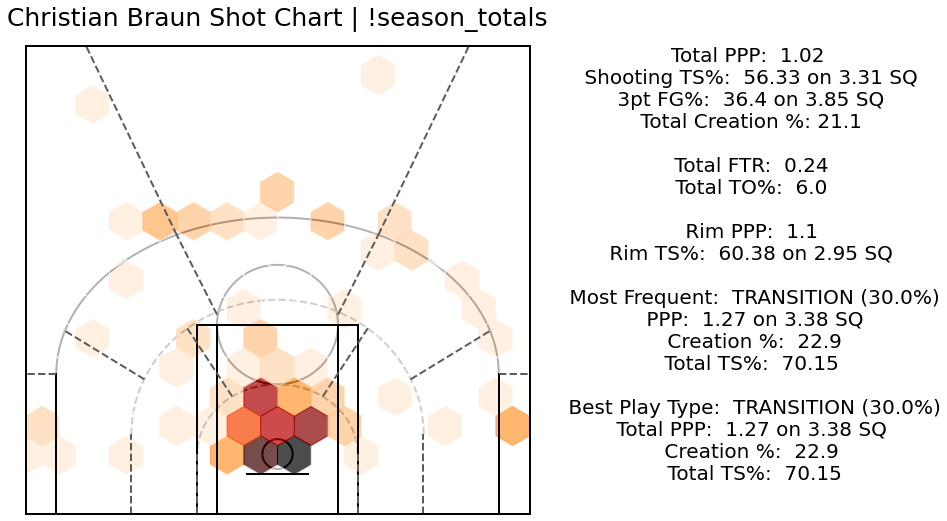

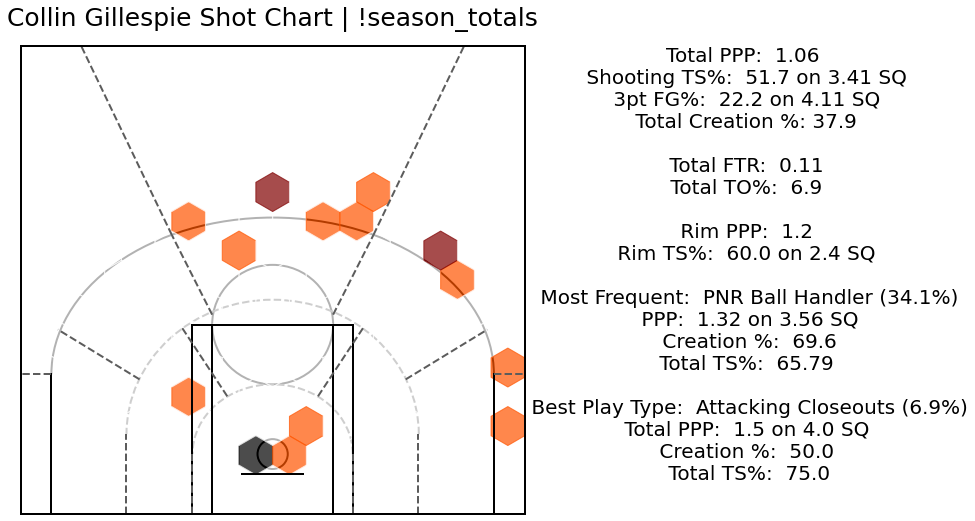

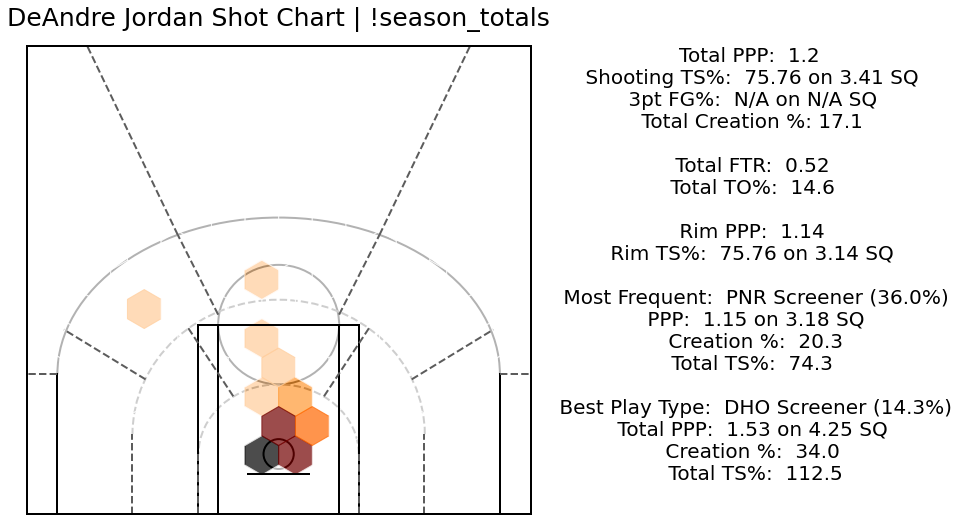

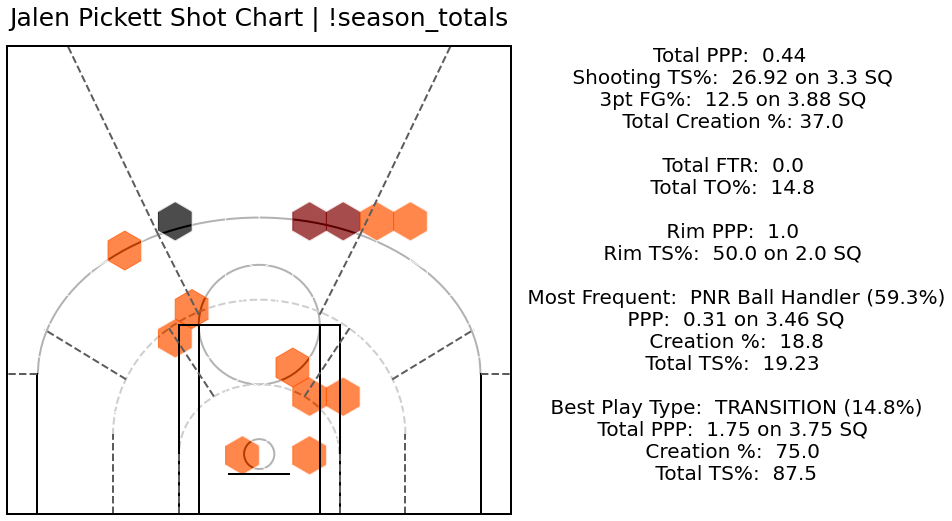

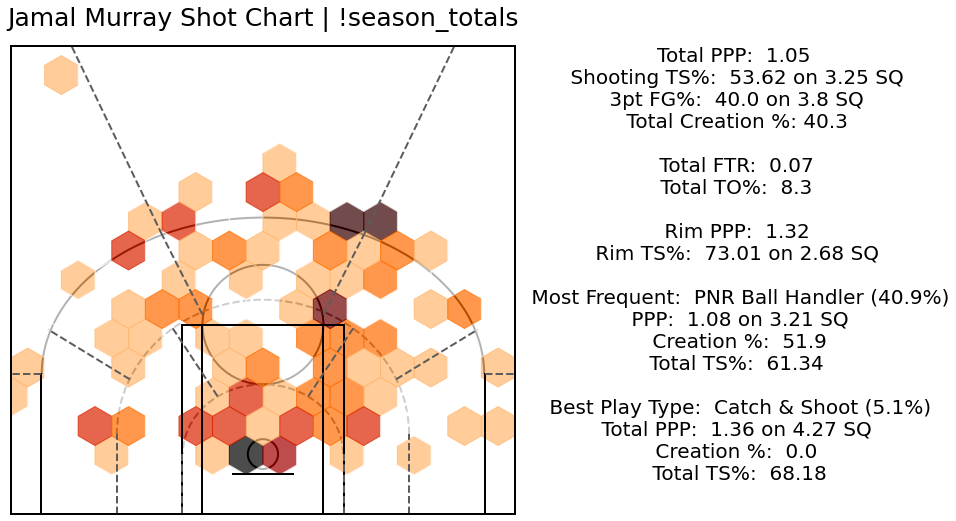

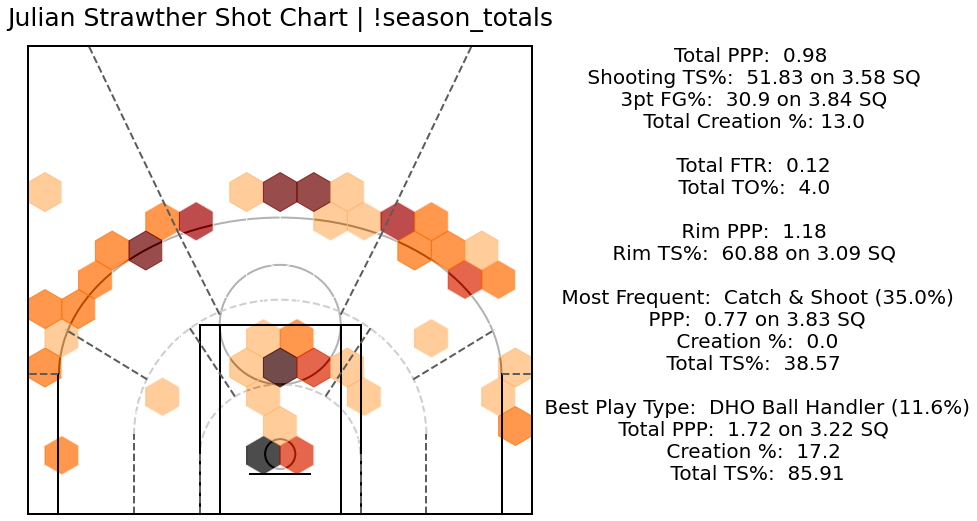

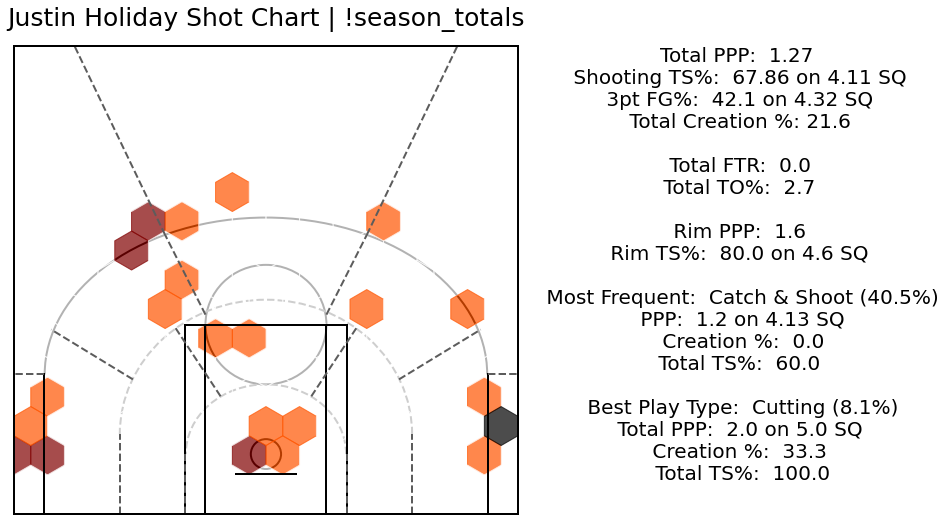

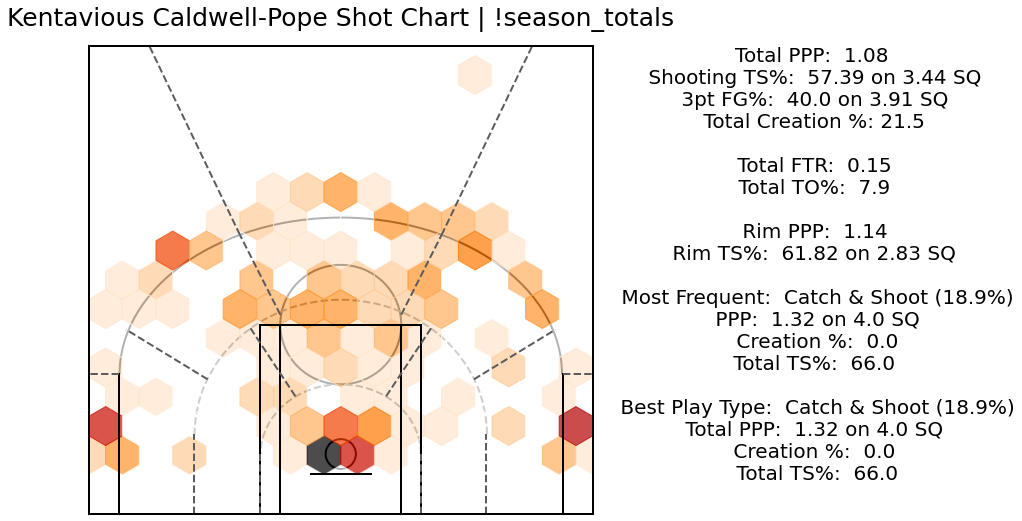

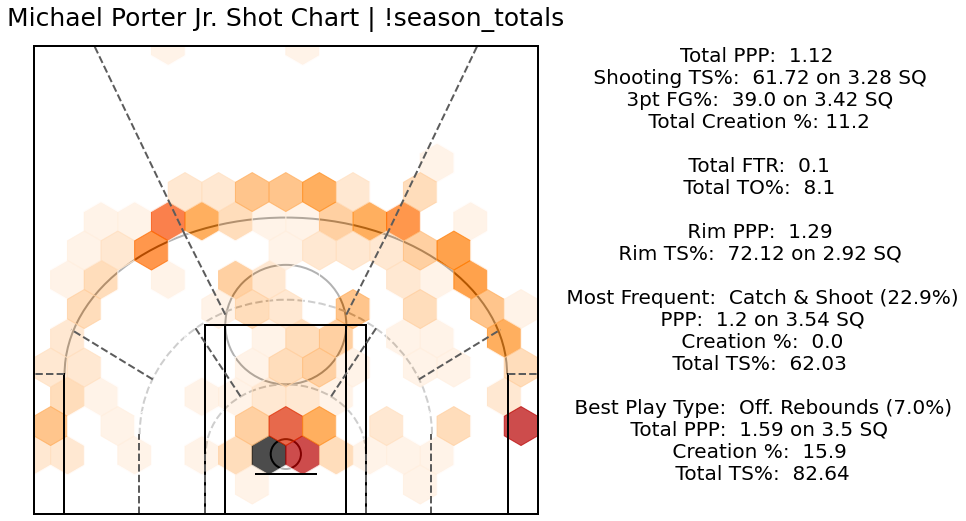

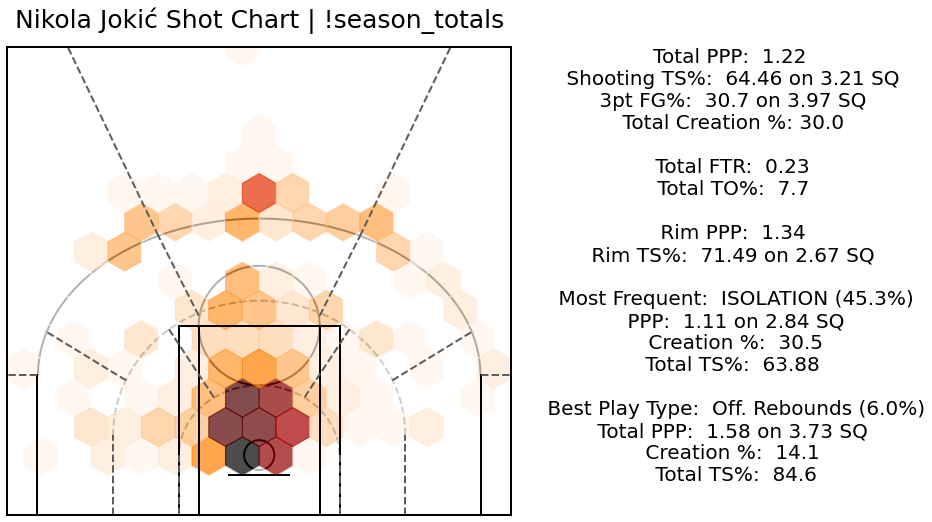

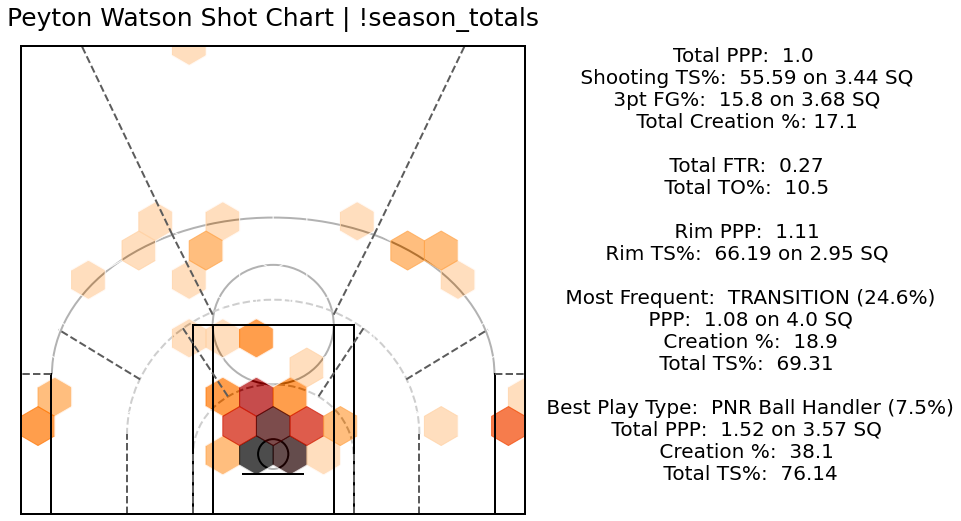

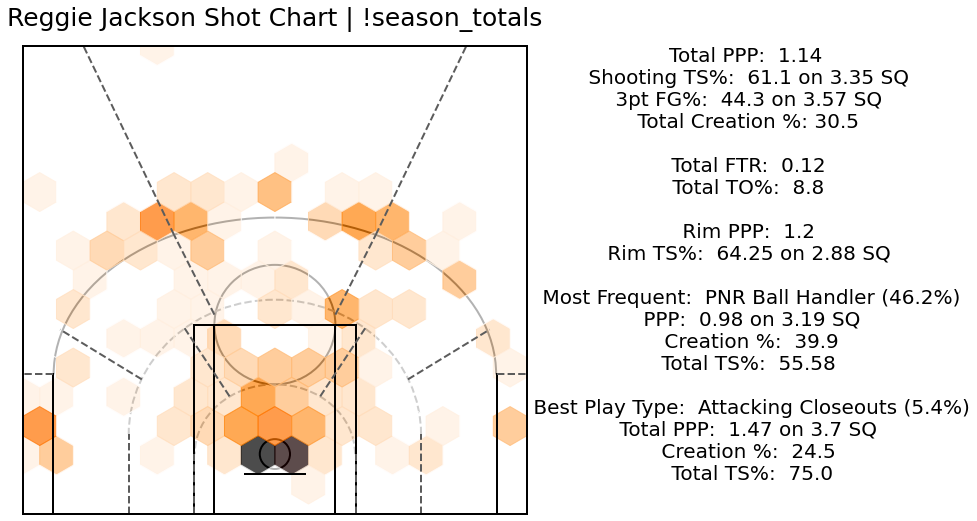

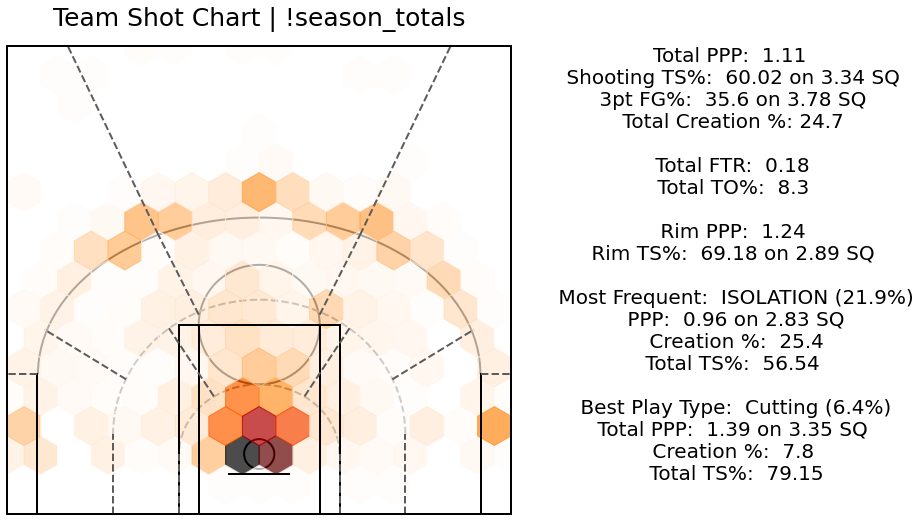

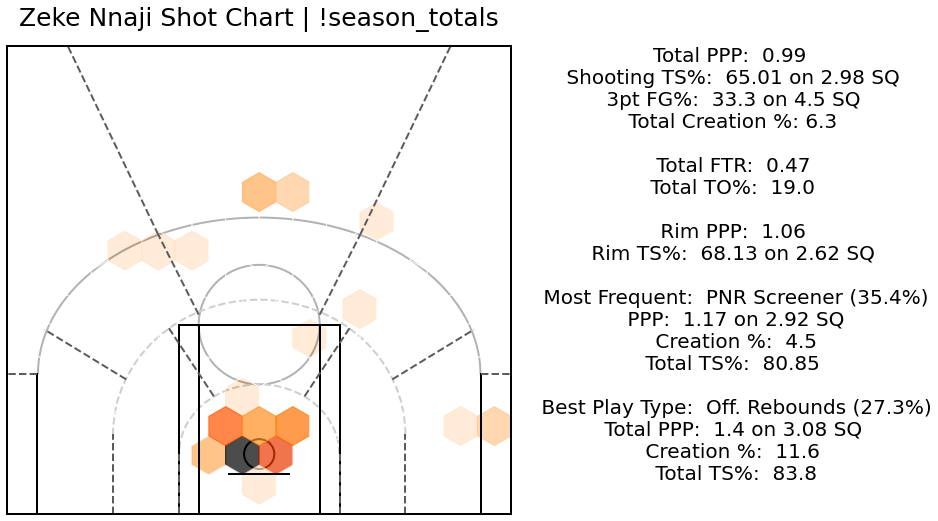

In [6]:
total_folder = 'data/!season_totals/Nuggets/Offense'
series_dir = f'data/!series_data/Nuggets/'
game_dir = f'data/{game}/Clippers/Offense'

players = []
for subdir, dirs, files in os.walk(total_folder):
    for file in files:
        if file[-5:] == '.json':
            player = file[:-5]
            players.append(player)

for player in players:
    if player[-10:] != 'checkpoint':
        if player not in  []:
            get_heat_map('Nuggets', player, total, 'Offense')

In [8]:
series_data = get_series_data('Clippers')

offense_defense = ['Offense', 'Defense']

for team in series_data.keys():
    if team != 'game_counter':
        for player in series_data[team].keys():
            for off_def in offense_defense:
                get_heat_map(series_data[team][player][off_def], player, off_def)

TypeError: get_heat_map() missing 1 required positional argument: 'off_def'

In [10]:
with open('Nuggets_vs_Rockets.json', 'w') as f:
    json.dump(series_data, f, indent=4, ensure_ascii=True,)            get_stats2('Nuggets', player, total, 'Offense', save=True)

In [7]:
def get_series_stats(team):
    
    offense_defense = ['Offense', 'Defense']
    games = []
    series_data = {'Nuggets': {'Offense': {}, 'Defense': {}}, team: {'Offense': {}, 'Defense': {}}, 'game_counter': 0}
    
    for game in os.listdir('data'):
        if game[9:] == team:
            games.append(game)
            
    for game in games:
        for team in series_data.keys():
            for off_def in offense_defense:
                
                path = f'data/{game}/{team}/{off_def}'
                
                for subdir, dirs, file in os.walk(path):
                    for player in file:
                        
                        if (player[-4:] != '.png') and (player[-15:] != 'checkpoint.json'):
                            
                            file_path = f'{path}/{player}'
                            
                            with open (file_path, 'r') as o:
                                file = json.load(o)
                            
                            for shot_zone in file.keys():
                                file[shot_zone]['data'] = pd.DataFrame(file[shot_zone]['data']).transpose()
                                
                            if (series_data['game_counter'] > 0) and (player[:-5] in series_data[team][off_def].keys()):
                                for shot_zone in series_data[team][off_def][player[:-5]].keys():
                                    series_data[team][off_def][player[:-5]][shot_zone]['data'] = pd.DataFrame(series_data[team][off_def][player[:-5]][shot_zone]['data']).transpose()
                            
                            if player[:-5] not in series_data[team][off_def].keys():
                                series_data[team][off_def][player[:-5]] = file
                                
                            else:
                                for shot_zone in file.keys():

                                    if shot_zone not in series_data[team][off_def][player[:-5]].keys():

                                        series_data[team][off_def][player[:-5]][shot_zone] = {'data': file[shot_zone]['data'], 
                                                                                              'shooting_locations': file[shot_zone]['shooting_locations']}
                                        
                                        if off_def == 'Offense':
                                            series_data[team][off_def][player[:-5]][shot_zone]['created_locations'] = file[shot_zone]['created_locations']

                                    series_data[team][off_def][player[:-5]][shot_zone]['data'] += file[shot_zone]['data']
                                    series_data[team][off_def][player[:-5]][shot_zone]['shooting_locations'].append(file[shot_zone]['shooting_locations'])
                                    
                                    if off_def == 'Offense':
                                        series_data[team][off_def][player[:-5]][shot_zone]['created_locations'].append(file[shot_zone]['created_locations'])

                            for shot_zone in series_data[team][off_def][player[:-5]].keys():
                                series_data[team][off_def][player[:-5]][shot_zone]['data'] = series_data[team][off_def][player[:-5]][shot_zone]['data'].to_dict(orient='index')
                                
        series_data['game_counter'] += 1
        
    return series_data

series_data = get_series_stats('Rockets')
series_data['game_counter']

dict_keys(['Nuggets', 'Rockets', 'game_counter'])3

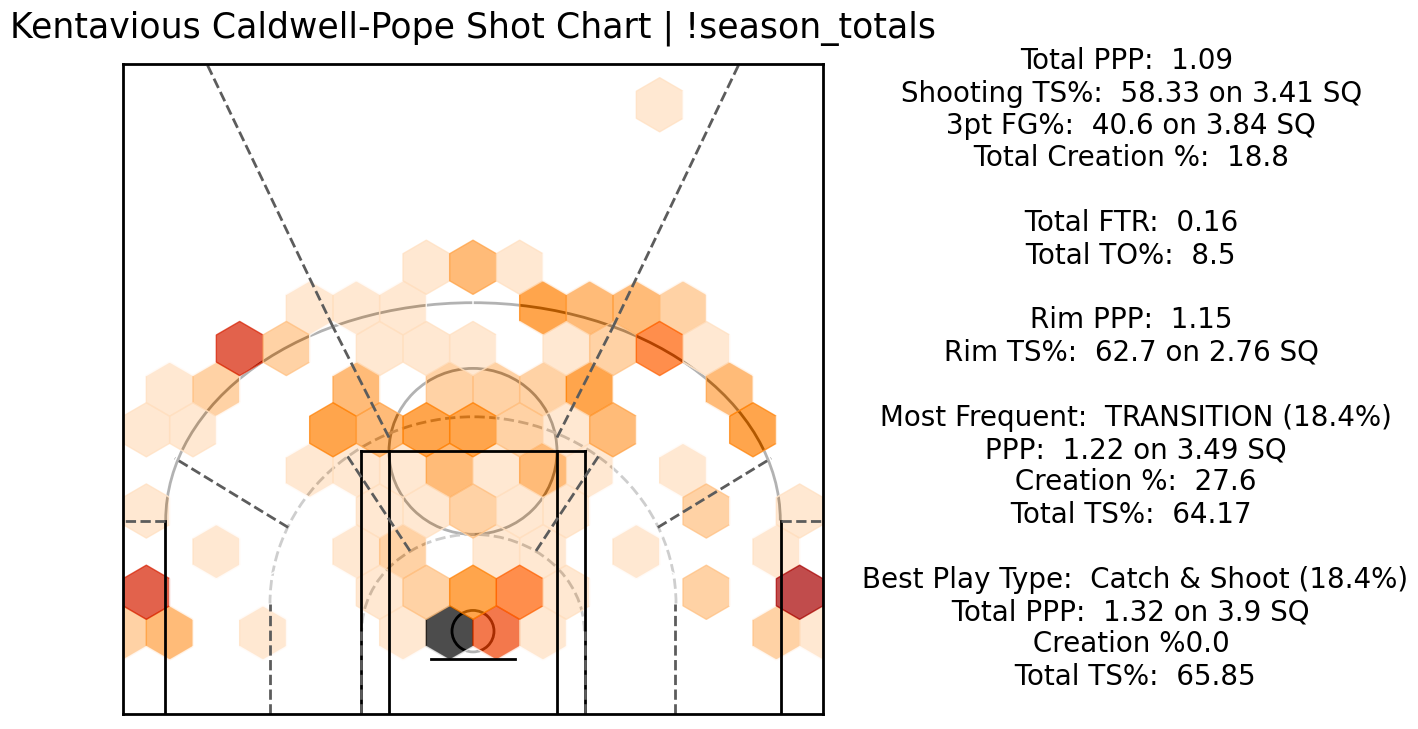

In [3]:
PPP_data, rim_PPP, nugg_off_fig = get_stats2('Nuggets', 'Kentavious Caldwell-Pope', total, 'Offense')

In [4]:
PPP_data

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.92,18.0,6,29.9,0.23,54.28,3.19,23,52.2,3.0,8,25.0,3.75,0.93,15.5,6,70.1,0.37,58.88,2.89,26,47.1,2.88,2,50.0,3.0,0.92,28.6,0,29.9,0.0,45.83,3.67,6,66.7,3.33,6,16.7,3.0
PNR Screener,1.63,3.0,1,14.8,1.0,95.49,4.5,2,100.0,4.0,2,50.0,5.0,1.56,3.2,1,85.2,1.33,94.54,5.0,2,100.0,5.0,3,50.0,5.0,2.0,2.4,0,14.8,0.0,100.0,3.0,1,100.0,3.0,0,N/A,5.0
DHO Ball Handler,0.91,17.7,3,23.9,0.03,49.4,3.25,27,48.1,3.04,9,33.3,3.89,0.87,16.6,3,76.1,0.0,48.15,3.22,25,45.5,3.0,5,40.0,4.2,1.06,22.5,0,23.9,0.11,52.97,3.33,5,60.0,3.2,4,25.0,4.2
DHO Screener,0.0,0.4,0,0.0,0.0,0.0,4.0,0,N/A,N/A,1,0.0,4.0,0.0,0.6,0,100.0,0.0,0.0,4.0,0,N/A,N/A,1,0.0,4.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.0
ISOLATION,0.8,6.2,4,14.5,0.5,56.35,2.88,5,40.0,2.6,3,33.3,3.33,0.77,6.5,4,85.5,0.67,57.99,2.67,6,25.0,2.75,5,50.0,2.5,1.0,4.8,0,14.5,0.0,50.0,3.5,1,100.0,2.0,1,0.0,2.5
TRANSITION,1.22,18.4,2,27.6,0.26,64.17,3.49,22,59.1,3.27,13,38.5,3.85,1.08,16.4,2,72.4,0.24,57.89,3.4,16,50.0,3.0,13,36.4,3.91,1.59,27.0,0,27.6,0.3,79.51,3.7,9,75.0,3.75,2,50.0,3.91
Attacking Closeouts,1.09,8.2,1,10.9,0.19,59.24,3.25,14,64.3,3.21,2,0.0,3.5,1.1,9.0,1,89.1,0.21,60.48,3.07,15,61.5,3.08,1,0.0,3.0,1.0,4.8,0,10.9,0.0,50.0,4.5,1,100.0,5.0,1,0.0,3.0
Catch & Shoot,1.32,18.4,0,0.0,0.0,65.85,3.9,0,N/A,N/A,41,43.9,3.9,1.32,22.7,0,100.0,0.0,65.85,3.9,0,N/A,N/A,41,43.9,3.9,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.9
Off Ball Screens,0.9,4.5,0,10.0,0.0,45.0,3.3,6,50.0,3.33,4,25.0,3.25,0.78,5.0,0,90.0,0.0,38.89,3.44,5,40.0,3.6,4,25.0,3.25,2.0,2.4,0,10.0,0.0,100.0,2.0,1,100.0,2.0,0,N/A,3.25
Cutting,1.23,3.3,2,33.3,0.75,92.21,2.0,3,66.7,1.33,1,100.0,4.0,0.82,2.7,2,66.7,1.0,69.44,2.0,4,50.0,2.0,0,N/A,N/A,2.05,5.8,0,33.3,0.5,125.0,2.0,1,100.0,0.0,1,100.0,N/A
